In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
def solver(boundary,dims,nx,ny,init_conds):
  # Definir la malla
  nx = 50 # Número de puntos en la dirección x
  ny = 50 # Número de puntos en la dirección y
  a, b = dims # Dimensiones del rectángulo
  x = np.linspace(0, a, nx)
  y = np.linspace(0, b, ny)
  X, Y = np.meshgrid(x, y)

  # Definir las condiciones de frontera
  phi = init_conds
  phi[:, -1] = boundary[':,-1'] # Condición de frontera en x=a
  phi[:,0] = boundary[':,0']
  phi[0,:] = boundary['0,:']
  phi[-1,:] = boundary['-1,:']
  # Definir el método de diferencias finitas
  dx = a/(nx-1)
  dy = b/(ny-1)
  error = 1e-4 # Criterio de convergencia
  max_iter = 1000 # Máximo número de iteraciones

  # Realizar el método de diferencias finitas
  for k in range(max_iter):
      # Guardar la solución anterior
      phi_old = phi.copy()

      # Actualizar la solución
      for i in range(1, ny-1):
          for j in range(1, nx-1):
              phi[i, j] = (1/4)*(phi[i+1, j]+phi[i-1, j]+phi[i, j+1]+phi[i, j-1])

  return X,Y,phi

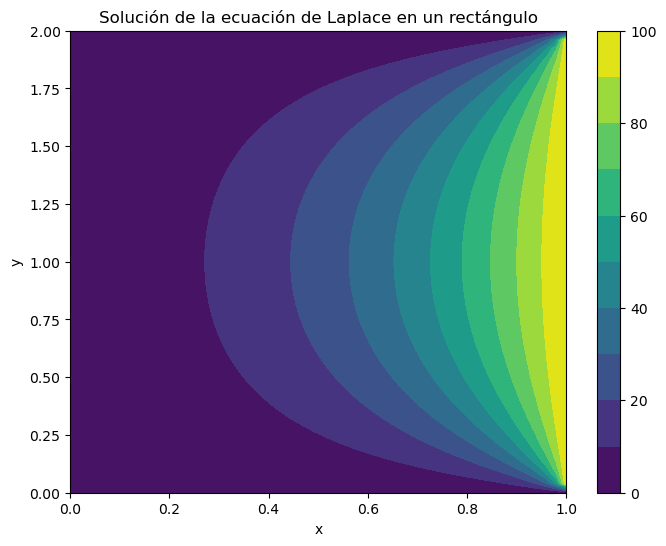

In [4]:
nx = 50 # Número de puntos en la dirección x
ny = 50 # Número de puntos en la dirección y
a,b = 1,2

boundary = {':,-1':100,
         ':,0':0,
         '0,:':0,
         '-1,:':0}

init_conds = np.random.rand(nx,ny)

X,Y,phi = solver(boundary,(a,b),nx,ny,init_conds)

# Graficar la solución
# create a figure and axes
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1) 

ax.set_xlabel('x')
ax.set_ylabel('y')

cont = ax.contourf(X, Y, phi, levels=np.linspace(0,100,11))
cbar = plt.colorbar(cont)

ax.set_title('Solución de la ecuación de Laplace en un rectángulo')
plt.show()


In [12]:
# animation function. This is called sequentially
def drawframe(n):
      global global_phi
      nx = 50 # Número de puntos en la dirección x
      ny = 50 # Número de puntos en la dirección y
      a,b = 1,2

      print(n)
      init_conds = global_phi[f'n={n}'] 

      boundary = {':,-1':0,
            ':,0':0,
            '0,:':0,
            '-1,:':0}

      boundary[':,-1'] = 4*np.exp(n*0.1)

      boundary['-1,:'] = global_phi[f'n={n}'][-2,:]

      boundary[':, 0'] = global_phi[f'n={n}'][:, 1]

      boundary['0,:'] = global_phi[f'n={n}'][1,:] #frontera izquierda

      X,Y,phi = solver(boundary,(a,b),nx,ny,init_conds)
      global_phi[f'n={n+1}'] = phi

      ax.clear
      ax.contourf(X, Y, phi, levels=np.linspace(0,100,11))


In [13]:
from matplotlib import animation

global_phi = {'n=0': np.zeros((nx,ny))}

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=60, interval=200, blit=False)

writergif = animation.PillowWriter(fps=30)
anim.save('anim.gif', writer=writergif)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


n=0
n=1
n=2
n=3
n=4
n=5
n=6
n=7
n=8
n=9
n=10
n=11
n=12
n=13
n=14
n=15
n=16
n=17
n=18
n=19
n=20


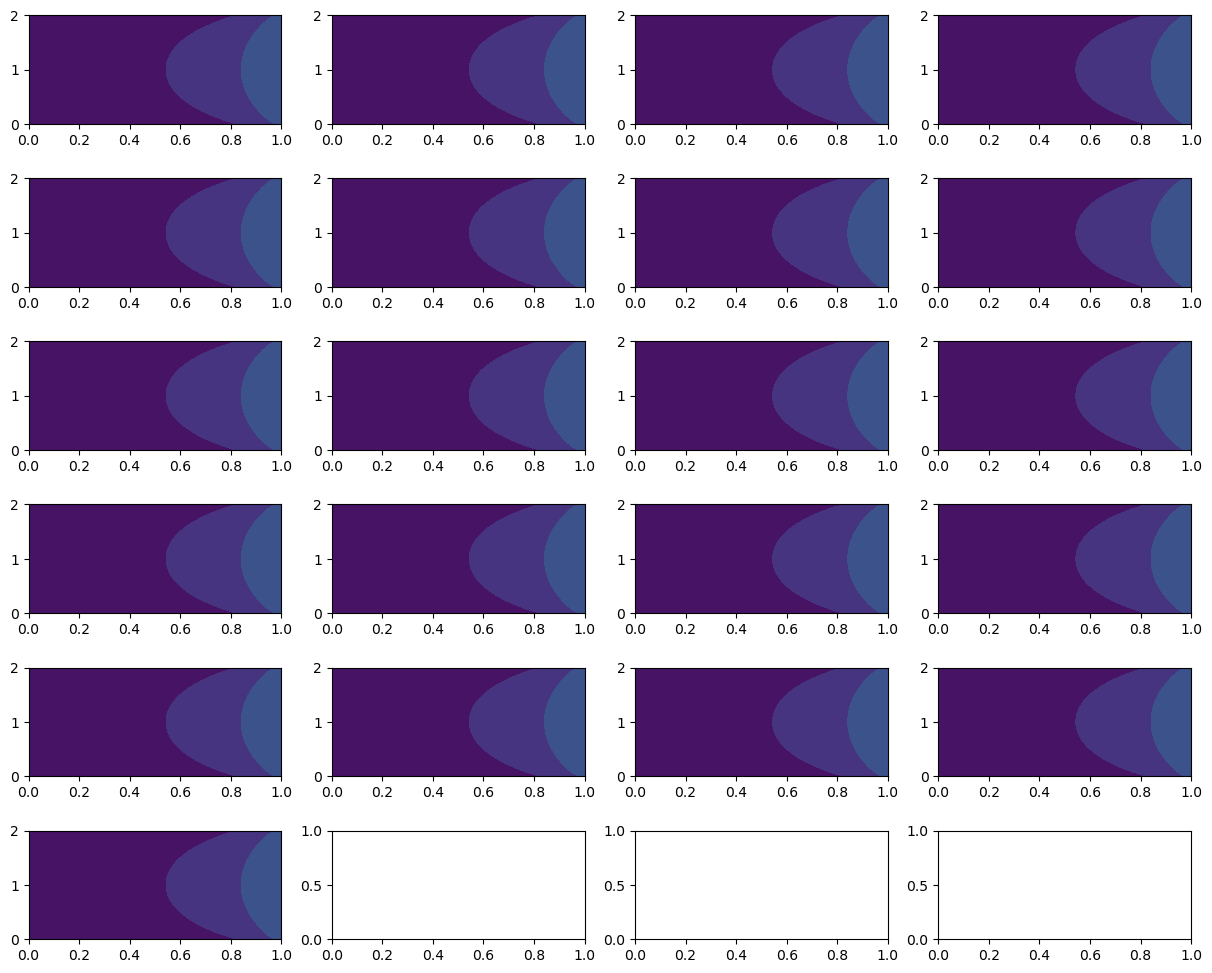

In [22]:
# define subplot grid
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
#fig.suptitle("_", fontsize=18, y=0.95)

axs = axs.ravel()

for n in global_phi:
  # Definir la malla
  nx = 50 # Número de puntos en la dirección x
  ny = 50 # Número de puntos en la dirección y
  a, b = (1,2) # Dimensiones del rectángulo
  x = np.linspace(0, a, nx)
  y = np.linspace(0, b, ny)
  X, Y = np.meshgrid(x, y)
  phi = global_phi[n]
  print(n)
  axs[int(n.replace('n=',''))].contourf(X, Y, phi, levels=np.linspace(0,100,11))
